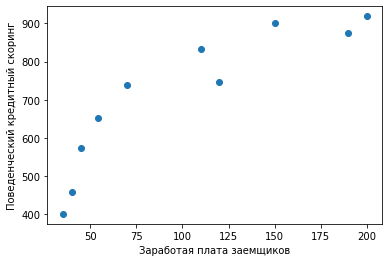

In [3]:
import numpy as np
import matplotlib.pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp, ks)
plt.xlabel('Заработная плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг', rotation = 90)
plt.show()

𝑏=  (𝑛∑_(𝑖=1)^𝑛▒〖𝑥_𝑖 𝑦_𝑖−(∑_(𝑖=1)^𝑛▒𝑥_𝑖 )(∑_(𝑖=1)^𝑛▒𝑦_𝑖 )〗)/(𝑛∑_(𝑖=1)^𝑛▒〖𝑥_𝑖〗_^2 −〖(∑_(𝑖=1)^𝑛▒𝑥_𝑖 )〗^2 )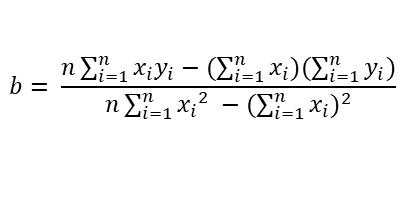![image.png]

In [5]:
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
b

2.620538882402765

𝑎= 𝑦 ̅− b𝑥 ̅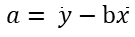!

In [6]:
a = np.mean(ks) - b * np.mean(zp)
a

444.1773573243596

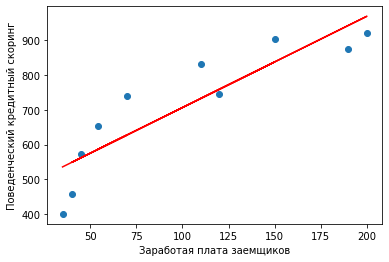

In [7]:
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp, c = 'r')
plt.xlabel('Заработая плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг', rotation = 90)
plt.show()

In [8]:
def mse(b, x, y):
    return np.sum((b * x - y) ** 2) / len(x)

In [9]:
mse(b, zp, ks)

203763.93896082853

In [14]:
def mse_p(b,x,y):
    return (2 / len(x)) * np.sum((b * x - y) * x)

In [16]:
alpha = 1e-6
b = 0.1
mse_min = mse(b, zp, ks)
i_min = 1
b_min = b
iteration = 10000
for i in range(iteration):
    b -= alpha * mse_p(b, zp, ks)
    if i % 100 == 0:
        print(f'>>> Итерация #{i}, b={b}, mse={mse(b, zp, ks)}')
    if mse(b, zp, ks) > mse_min:
        print(f'>>> Итерация #{i_min}, b={b_min}, mse={mse_min},\n>>> Достигнут минимум\n>>> Получили {b_min} ')
        break
    else:
        mse_min = mse(b,zp,ks)
        i_min = i
        b_min = b

>>> Итерация #0, b=0.25952808000000005, mse=493237.7212546963
>>> Итерация #100, b=5.54537842245223, mse=58151.31823171113
>>> Итерация #200, b=5.868748638669329, mse=56522.97550129376
>>> Итерация #300, b=5.888531320728348, mse=56516.88130936019
>>> Итерация #400, b=5.8897415574471985, mse=56516.85850140053
>>> Итерация #500, b=5.889815595583751, mse=56516.858416040064
>>> Итерация #600, b=5.889820124983314, mse=56516.85841572062
>>> Итерация #628, b=5.889820285147628, mse=56516.85841571966,
>>> Достигнут минимум
>>> Получили 5.889820285147628 


In [17]:
def mse_ab(a,b, x, y):
    return np.sum(((a + b * x)-y) ** 2) / len(x)

In [18]:
def mse_pa(a, b, x, y): 
    return 2 * np.sum((a + b * x) - y) / len(x)

In [19]:
def mse_pb(a, b, x, y):
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

In [20]:
alpha = 3e-5
b = 0.1
a = 0.1
mseab_min = mse_ab(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a
iteration = 1000000   
for i in range(iteration):
    a -= alpha * mse_pa(a, b, zp, ks)
    b -= alpha * mse_pb(a, b, zp, ks)
    if i % 50000 == 0:
        print(f'>>> Итерация #{i}, a={a}, b={b}, mse={mse_ab(a, b, zp, ks)}')
    if mse_ab(a, b, zp, ks) > mseab_min:
        print(f'>>> Итерация #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min = mse_ab(a, b, zp, ks)
        i_min = i
        b_min = b
        a_min = a
print(f'>>> a = {a_min}\n>>> b = {b_min}')

>>> Итерация #0, a=0.14197959999999998, b=4.884978596113599, mse=70366.2821016992
>>> Итерация #50000, a=236.72655235964433, b=4.147445287981601, mse=17387.09579189967
>>> Итерация #100000, a=347.2559075176058, b=3.3339127474648516, mse=8853.283372220058
>>> Итерация #150000, a=398.89545333636954, b=2.953828643644366, mse=6990.541626266601
>>> Итерация #200000, a=423.0215571081485, b=2.7762525556795365, mse=6583.946467915477
>>> Итерация #250000, a=434.29332323191153, b=2.69328863611563, mse=6495.195773862671
>>> Итерация #300000, a=439.5595159313502, b=2.6545277194387675, mse=6475.823468184463
>>> Итерация #350000, a=442.0198921708081, b=2.6364185381280407, mse=6471.594924044105
>>> Итерация #400000, a=443.16938509390076, b=2.6279578907579992, mse=6470.671926759022
>>> Итерация #450000, a=443.70643059087314, b=2.624005058617609, mse=6470.470456948132
>>> Итерация #500000, a=443.95733936988626, b=2.622158287177236, mse=6470.426480562332
>>> Итерация #550000, a=444.07456447602823, b=2.6

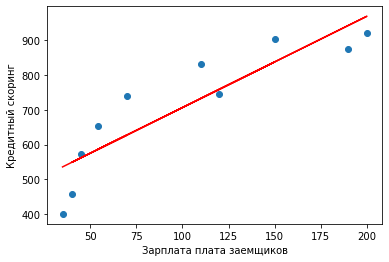

In [22]:
plt.scatter(zp, ks)
plt.plot(zp, a_min + b_min * zp, c = 'r')
plt.xlabel('Зарплата плата заемщиков')
plt.ylabel('Кредитный скоринг', rotation = 90)
plt.show()